## **PROBLEM STATEMENT**
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **TASK**
* Divide customers into segments to help the business know its customers


### **DATA**
The dataset contains data collected from a marketing campaign

#### **Data Attributes**

#### People
* **ID**: Customer's unique identifier
* **Year_Birth**: Customer's birth year
* **Education**: Customer's education level
* **Marital_Status**: Customer's marital status
* **Income**: Customer's yearly household income
* **Kidhome**: Number of children in customer's household
* **Teenhome**: Number of teenagers in customer's household
* **Dt_Customer**: Date of customer's enrollment with the company
* **Recency**: Number of days since customer's last purchase
* **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

* **MntWines**: Amount spent on wine in last 2 years
* **MntFruits**: Amount spent on fruits in last 2 years
* **MntMeatProducts**: Amount spent on meat in last 2 years
* **MntFishProducts**: Amount spent on fish in last 2 years
* **MntSweetProduct**s: Amount spent on sweets in last 2 years
* **MntGoldProds**: Amount spent on gold in last 2 years

#### Promotion

* **NumDealsPurchases**: Number of purchases made with a discount
* **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 * otherwise
* **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp**3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

* **NumWebPurchases**: Number of purchases made through the company’s website
* **NumCatalogPurchases**: Number of purchases made using a catalogue
* **NumStorePurchases**: Number of purchases made directly in stores
* **NumWebVisitsMonth**: Number of visits to company’s website in the last month


#### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colabs/Berkeley_Professional_Certificate_In_ML/Section_4/Customer_Segmentation/data/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


After taking a look at the dataset 2 features not added to the data description were found 'Z_CostContact', and 'Z_Revenue'

lets take a look at them

In [ ]:
data['Z_CostContact'].value_counts()

,count
Z_CostContact,
3,2240


In [ ]:

data['Z_Revenue'].value_counts()

,count
Z_Revenue,
11,2240


It appears both features only have 1 value, hence it doesnt tell us much about the customers, so let's drop them

In [ ]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
#Get more info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.shape

(2240, 27)

#Data Cleaning


In [ ]:
#Check for missing values
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


'Income' is the only column with missing values

In [ ]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
# convert the year_birth column to the age of the customer
data['Age'] = 2025 - data['Year_Birth']
data.drop('Year_Birth', axis=1, inplace=True)
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44


Since the 'DT_Customer' column represents when the customer enrolled with the company, we can covert it to represent the number of days since the customer enrolled with the company

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y') #first convert object data to datatime data and use the correct format
data['Dt_Customer'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,2174,Graduation,Single,46344.0,1,1,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,4141,Graduation,Together,71613.0,0,0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,6182,Graduation,Together,26646.0,1,0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,5324,PhD,Married,58293.0,1,0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44


# Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [ ]:
cols = data.columns
cat_cols = []
num_cols = []

for i in cols:
  if data[i].dtype == 'object':
    cat_cols.append(i)
  else:
    num_cols.append(i)

print(cat_cols)
print(num_cols)

['Education', 'Marital_Status']
['ID', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age']


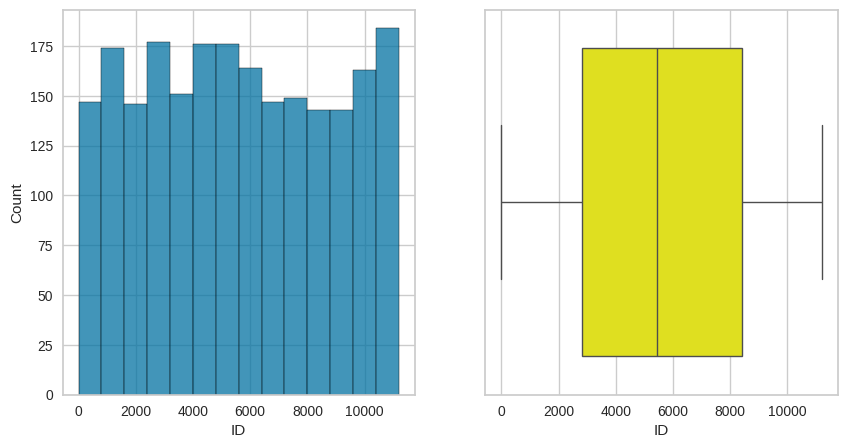

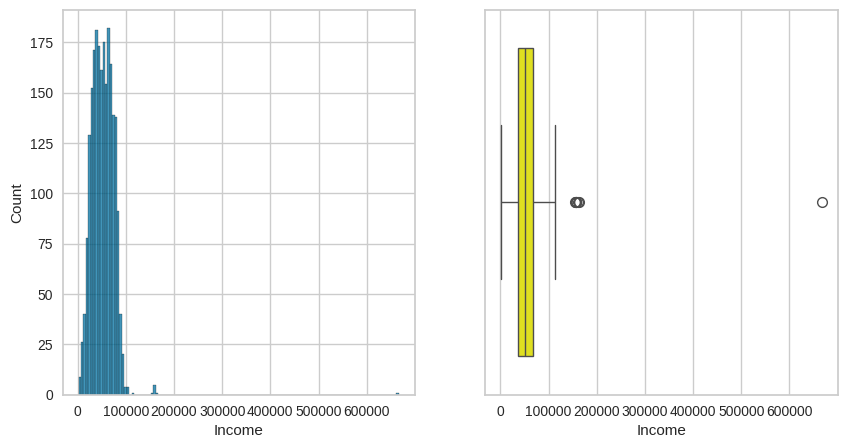

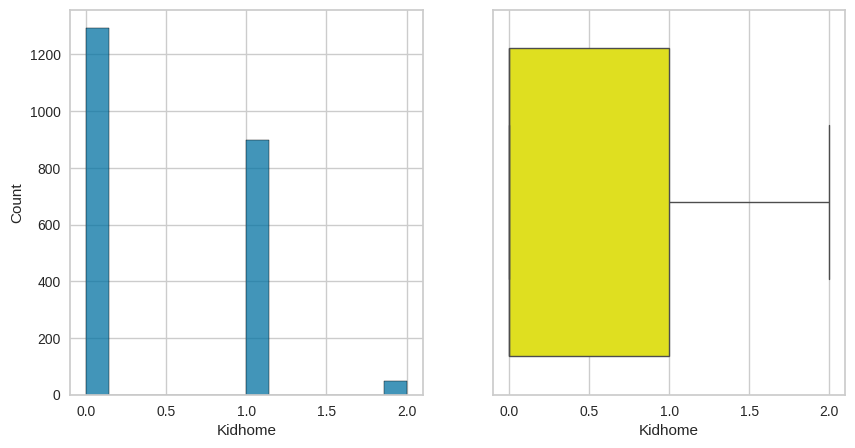

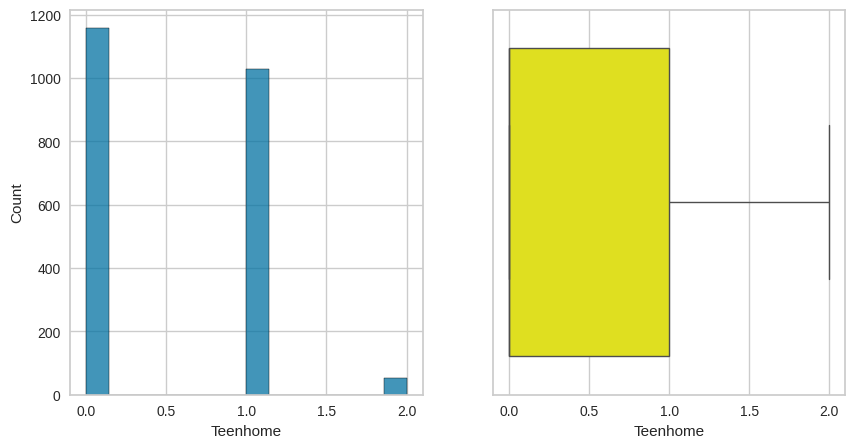

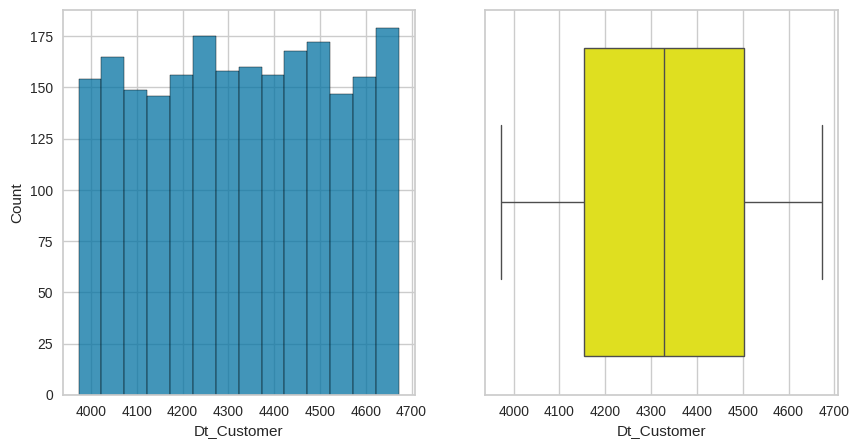

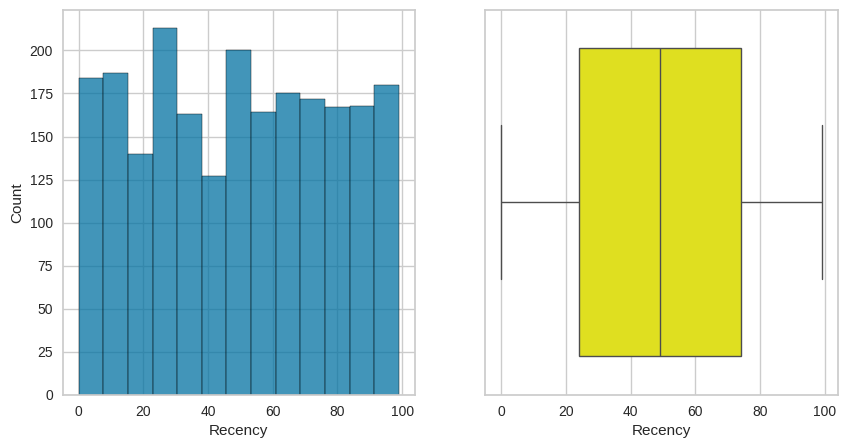

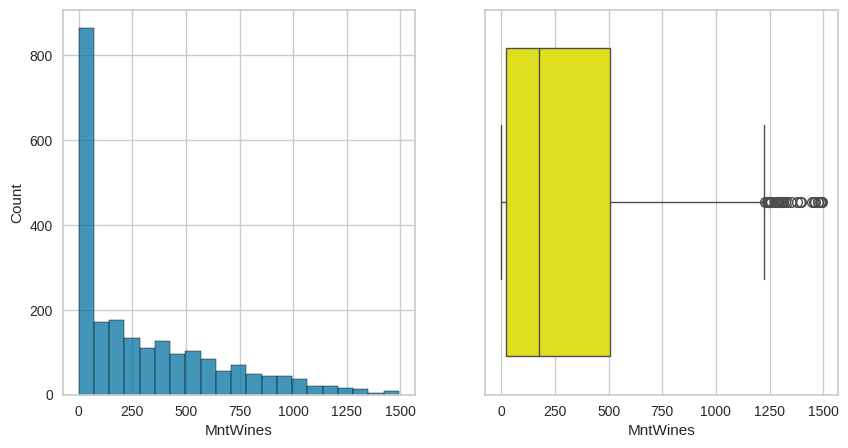

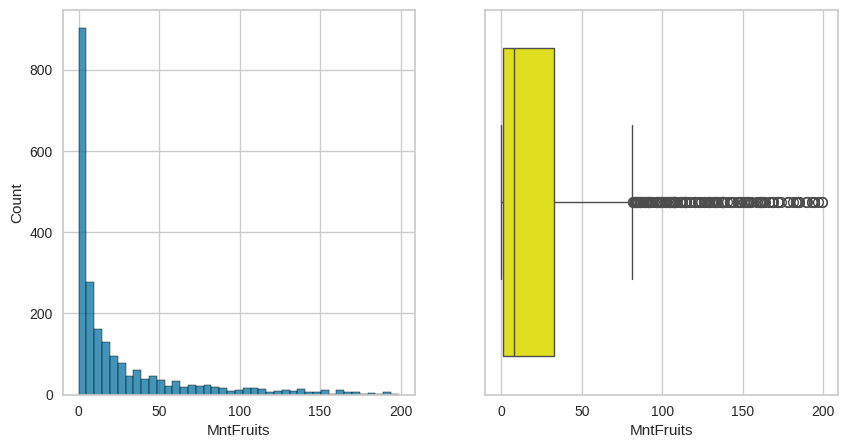

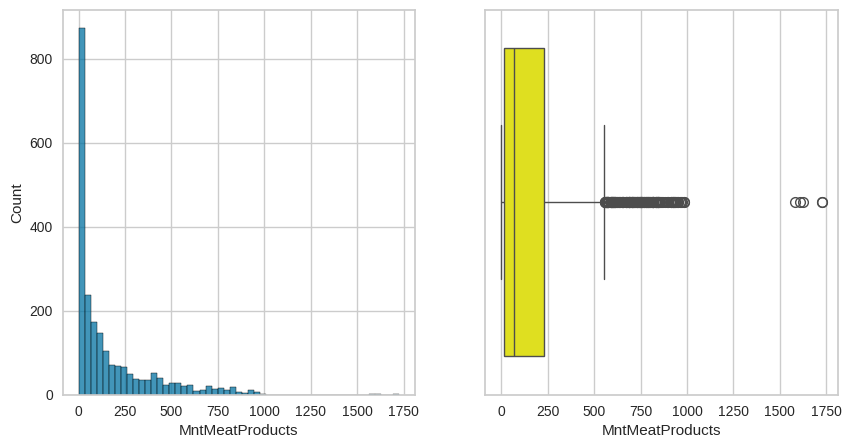

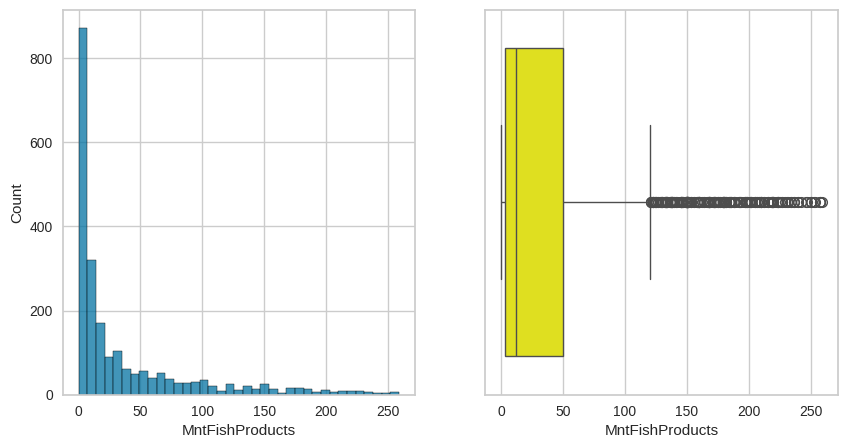

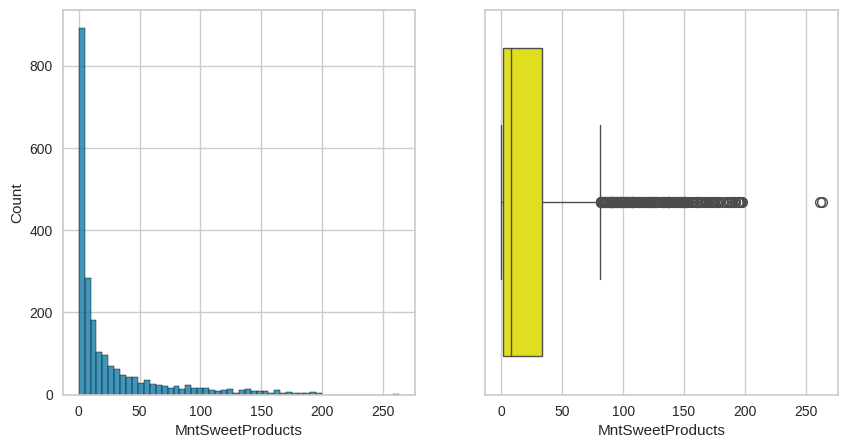

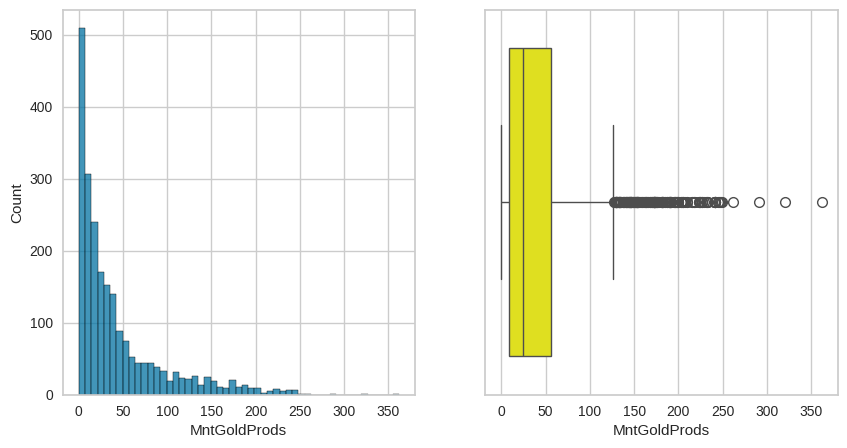

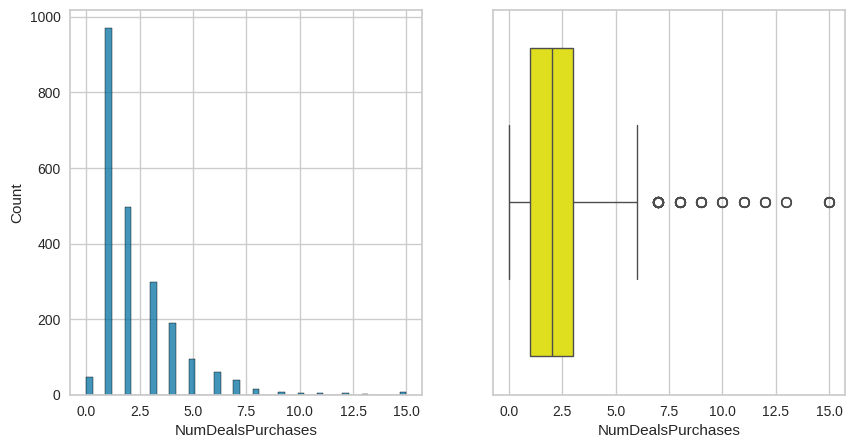

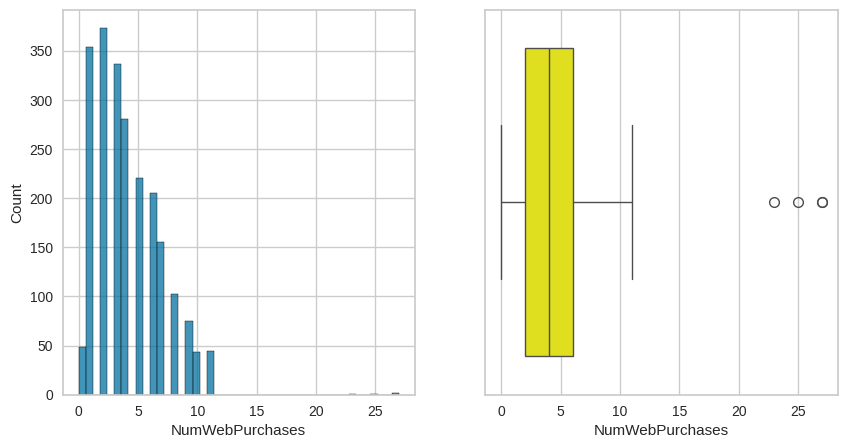

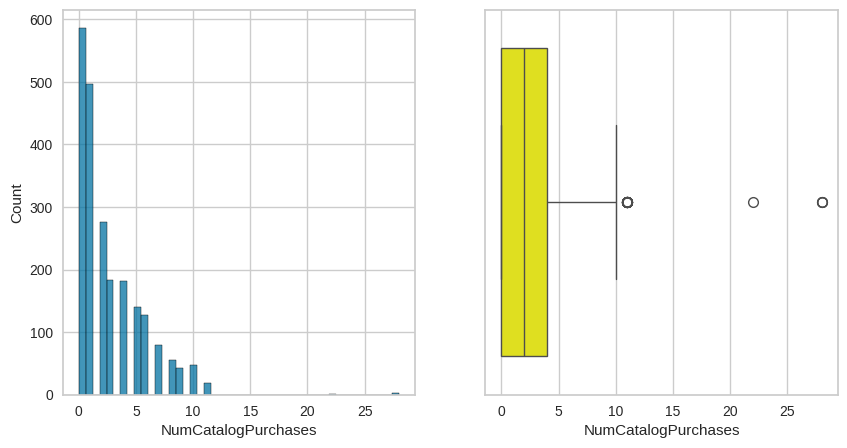

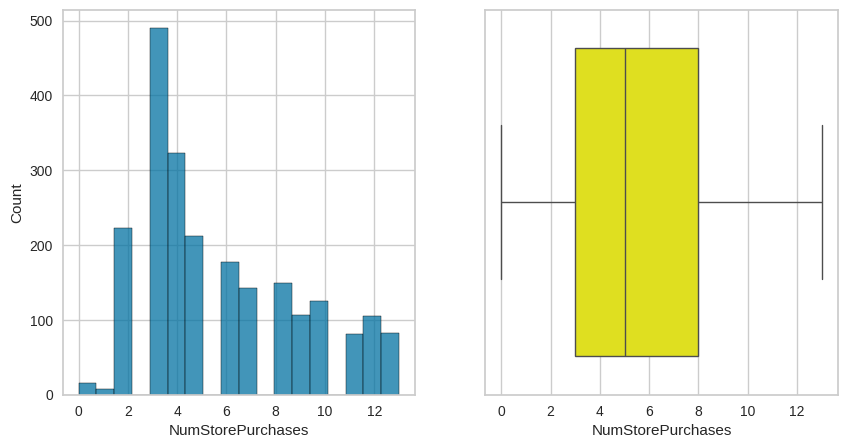

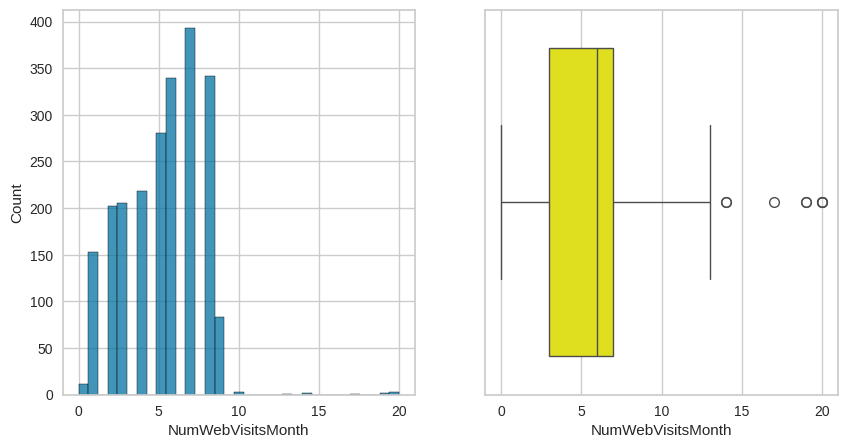

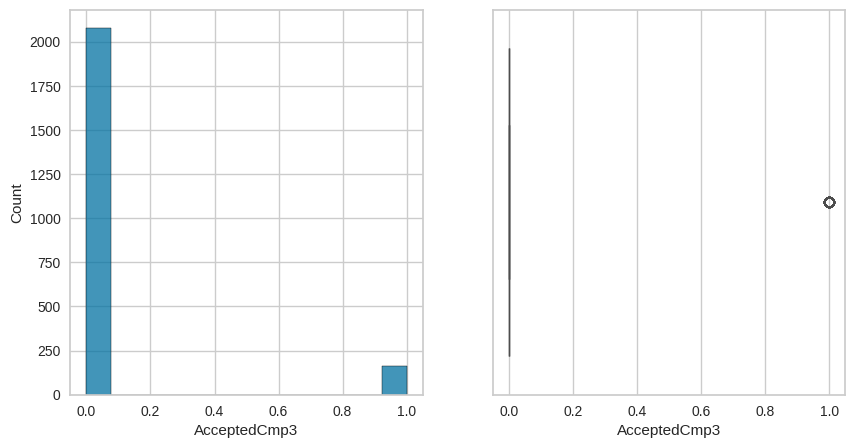

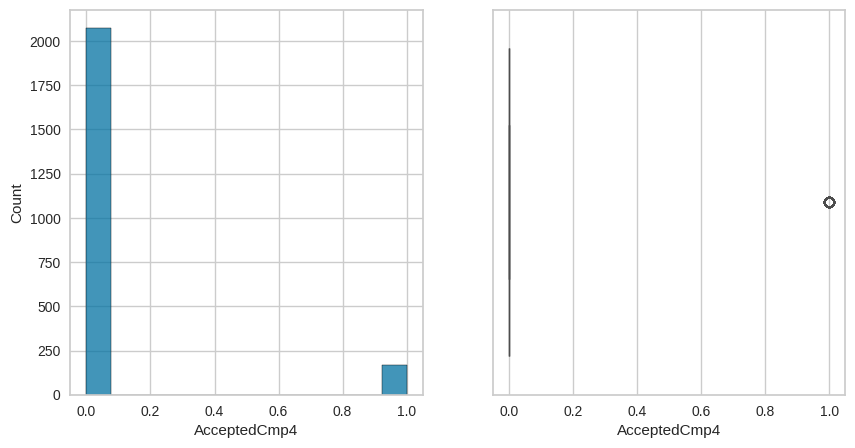

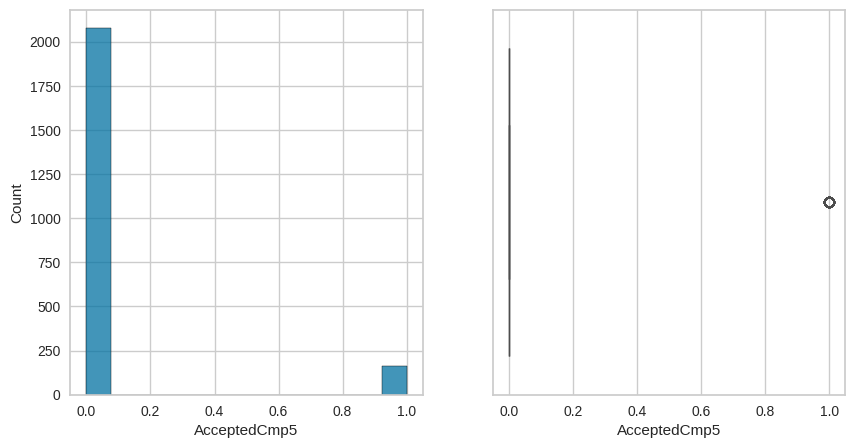

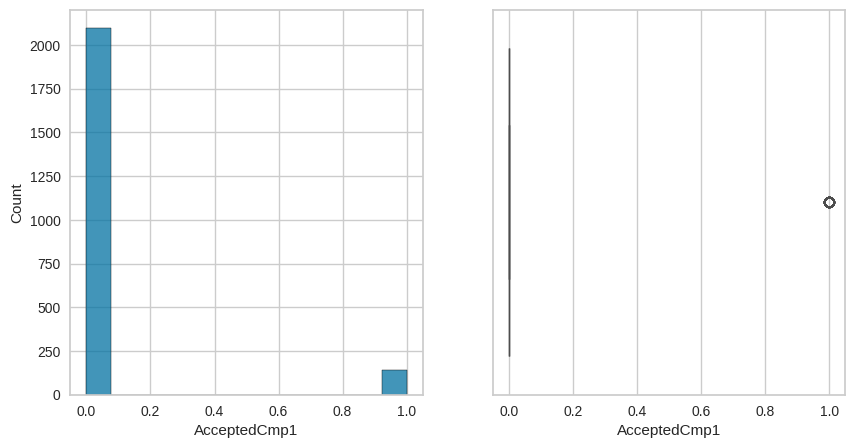

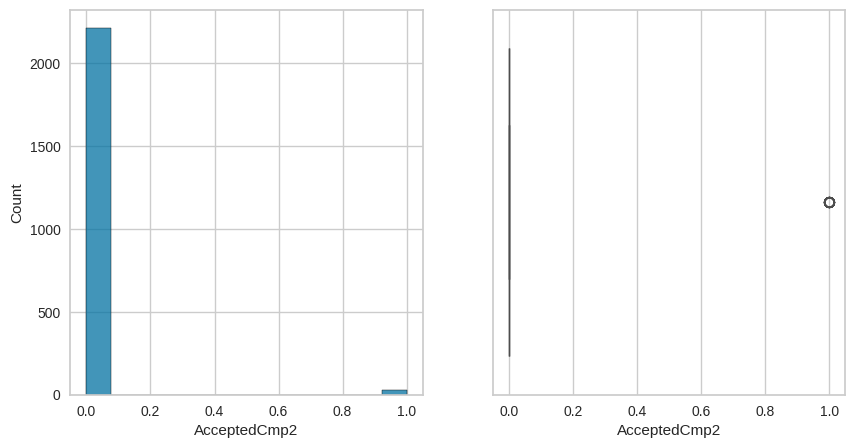

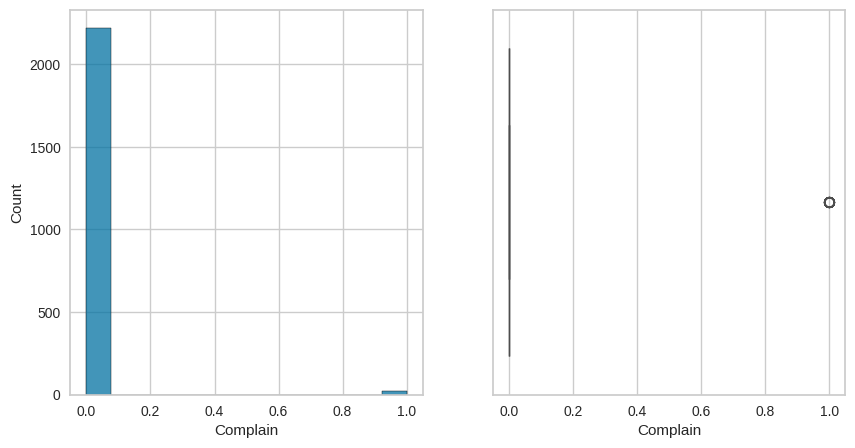

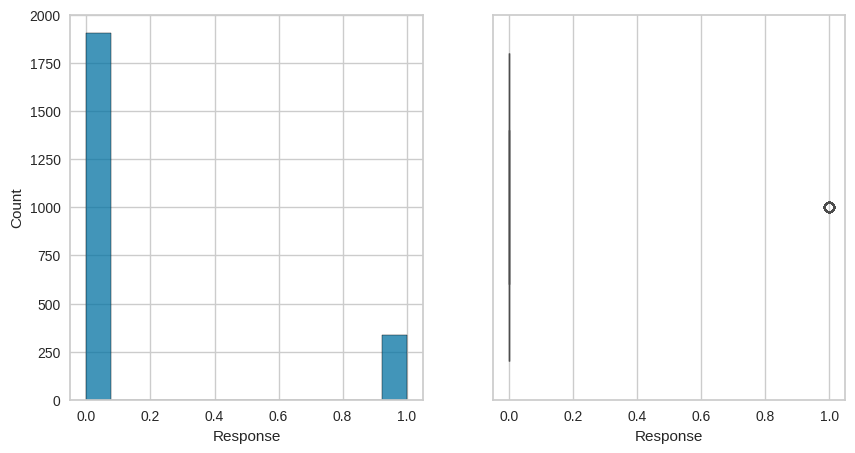

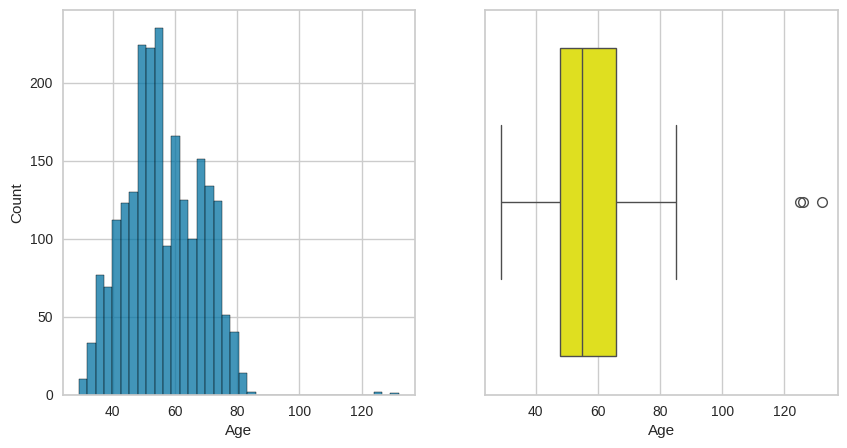

In [ ]:
#code to plot the histogram as well as boxplot for each numerical column
for i in num_cols:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(data[i], ax=ax1)
  sns.boxplot(x=data[i], color='yellow', ax=ax2)
  plt.show()

The essence of this plot was to take a look at the data distribution and it was noticed that the data has a number of outliers which will be addressed later

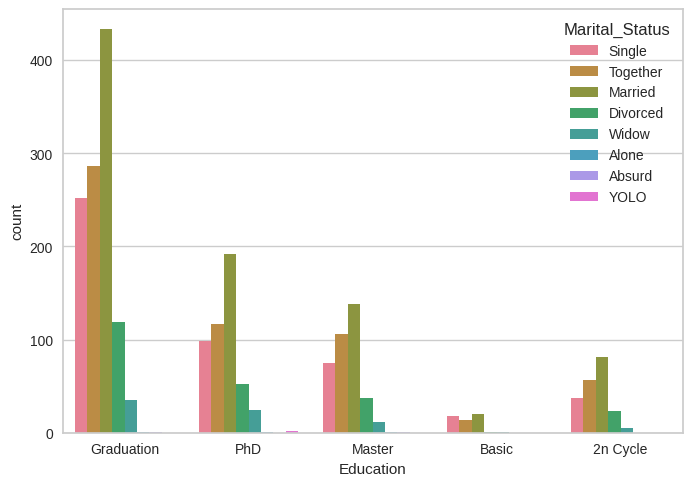

In [ ]:
#Bivariate analysis
sns.countplot(x='Education', hue='Marital_Status', data=data)
plt.show()

Most of the customers are married and graduates

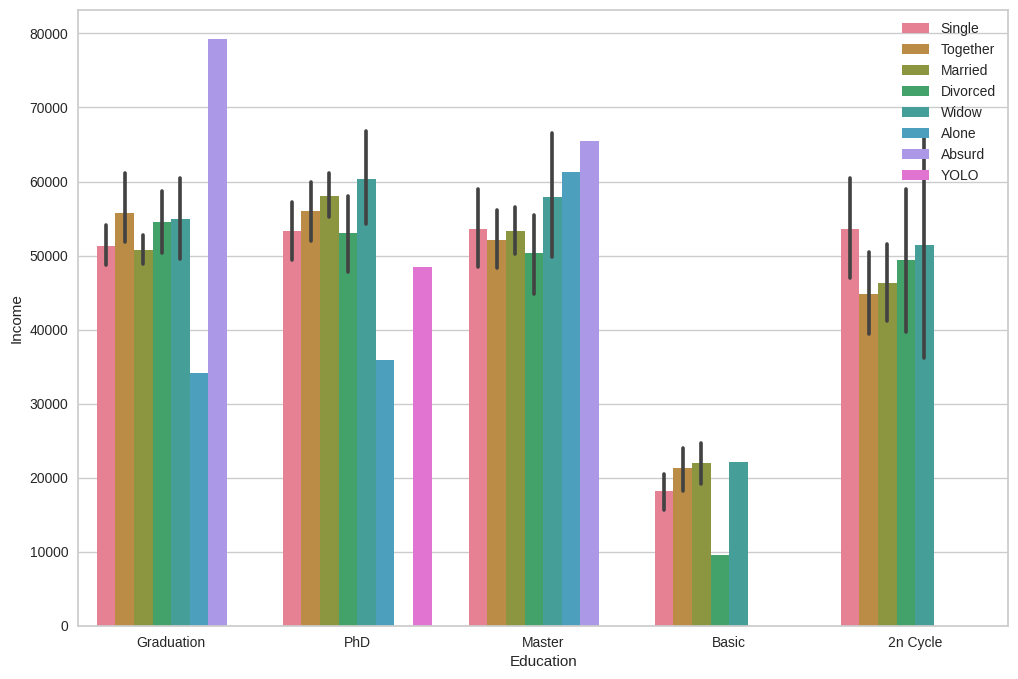

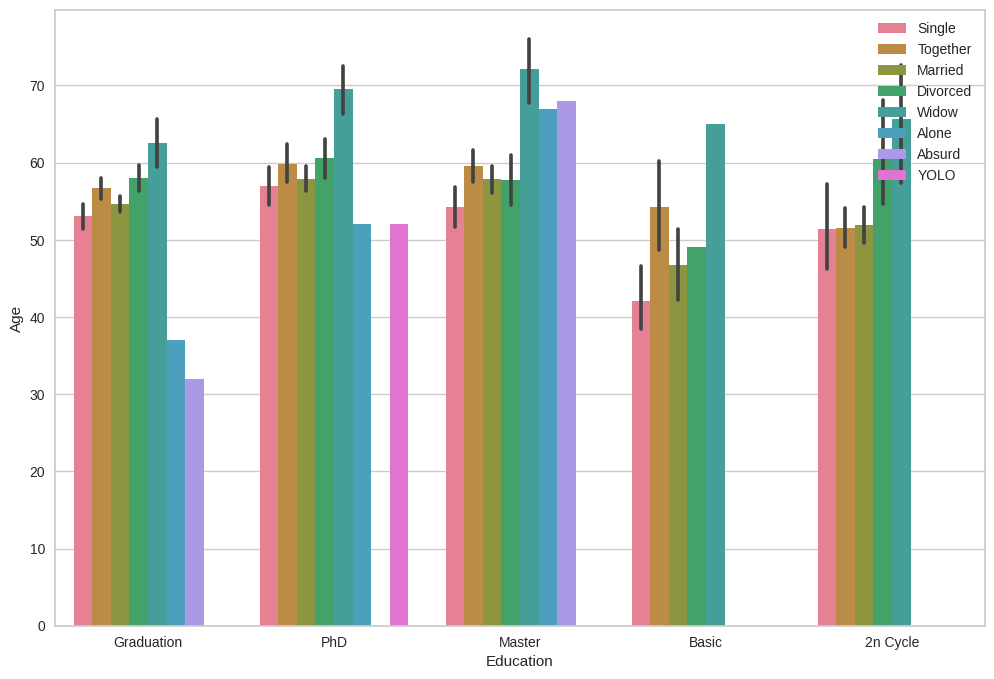

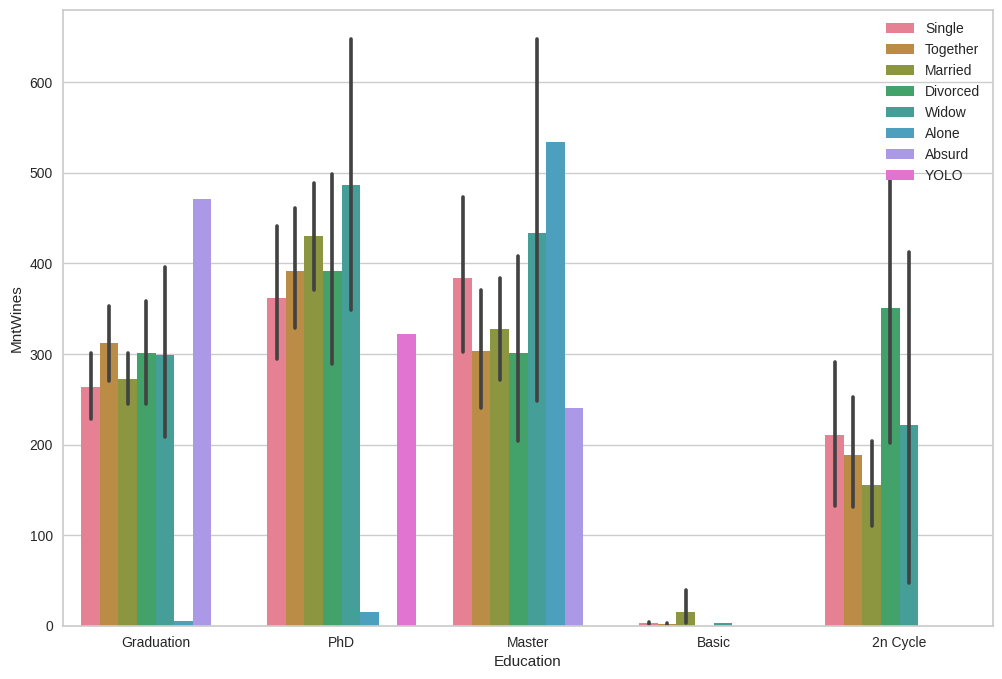

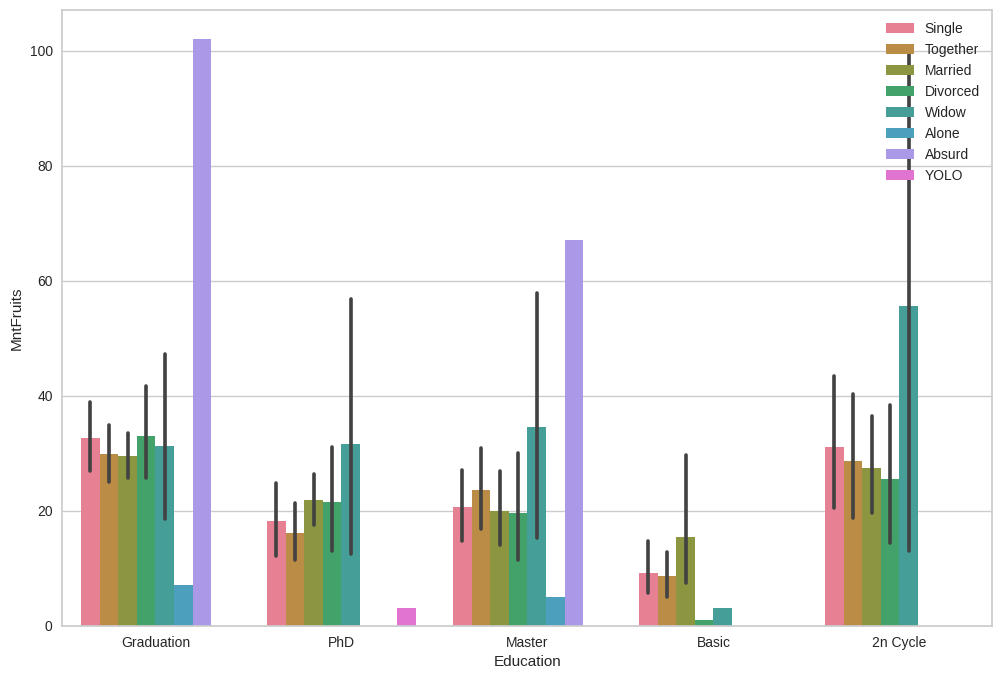

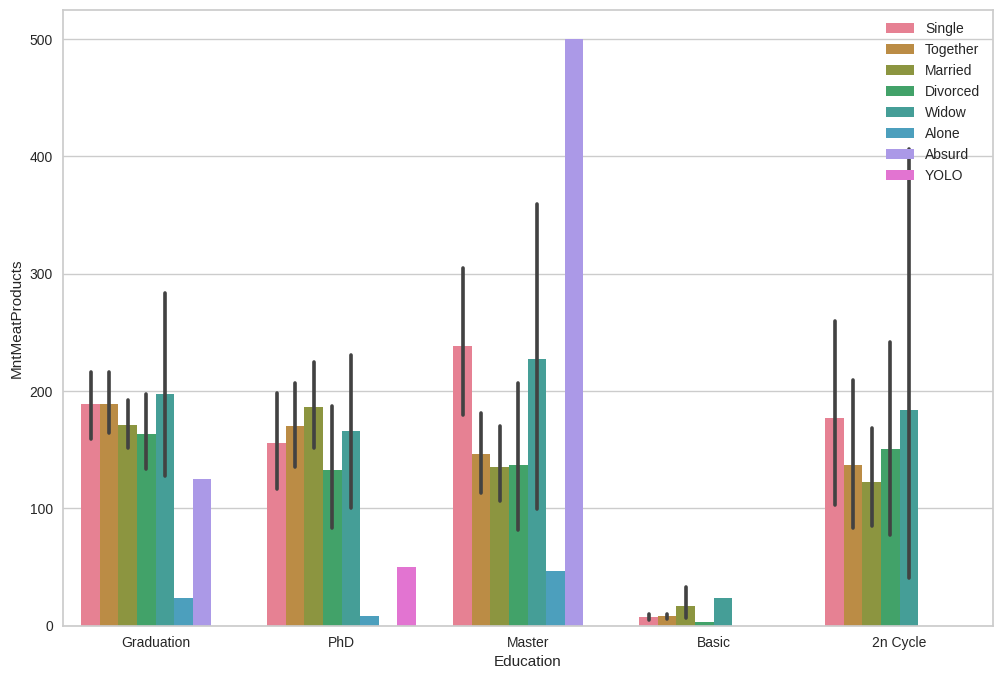

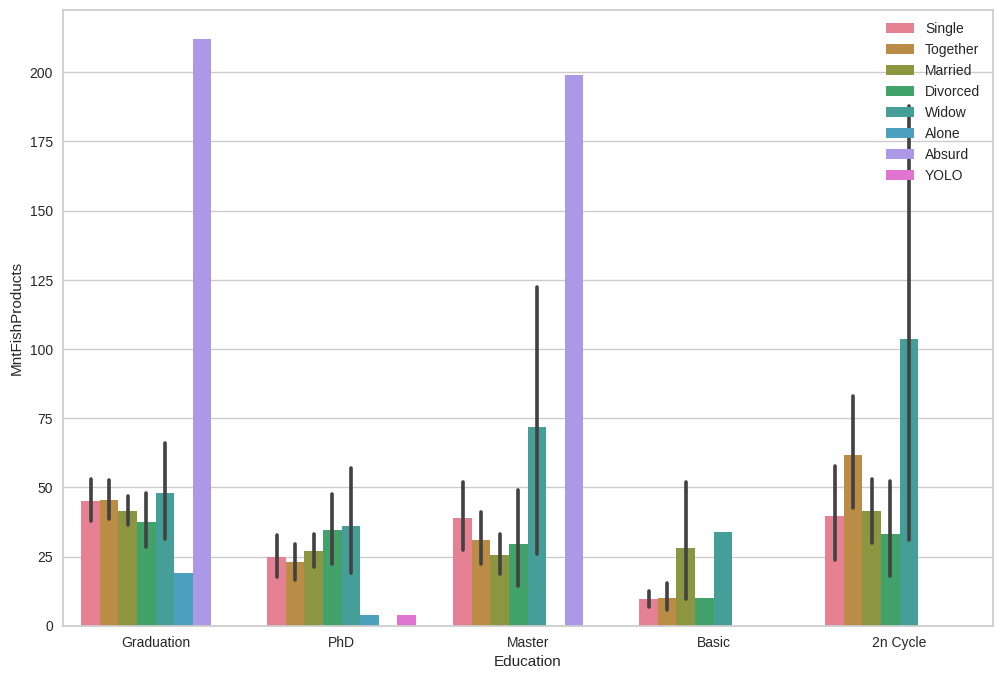

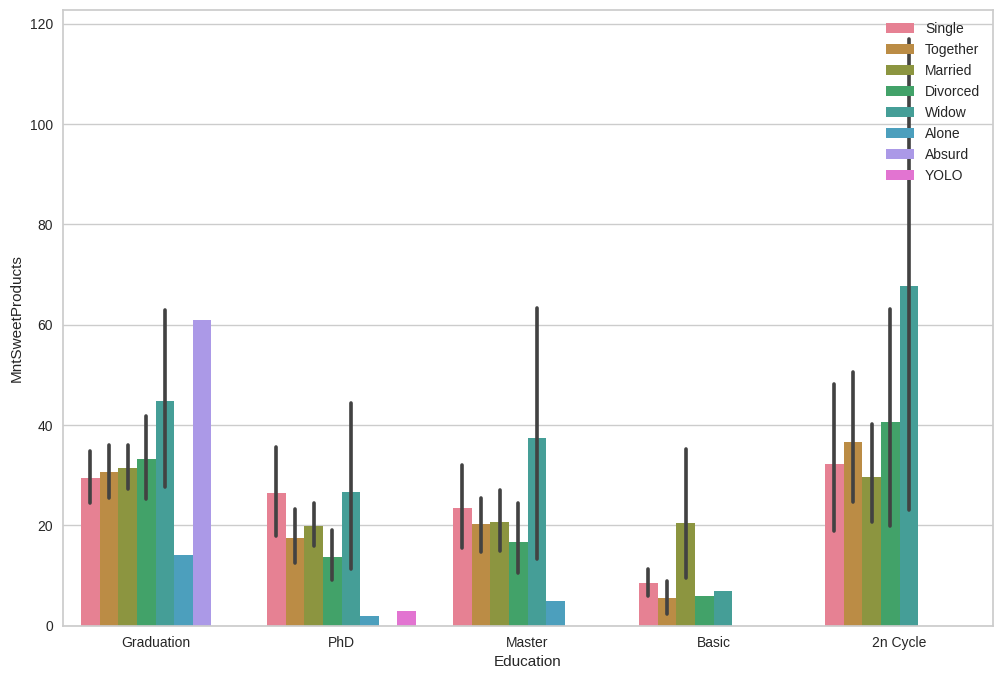

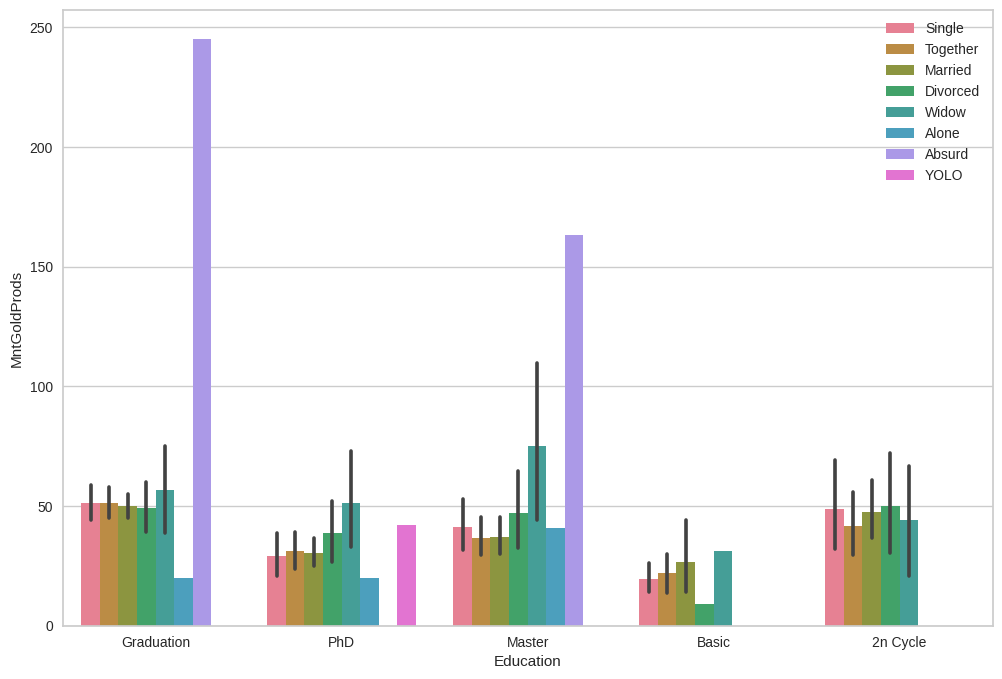

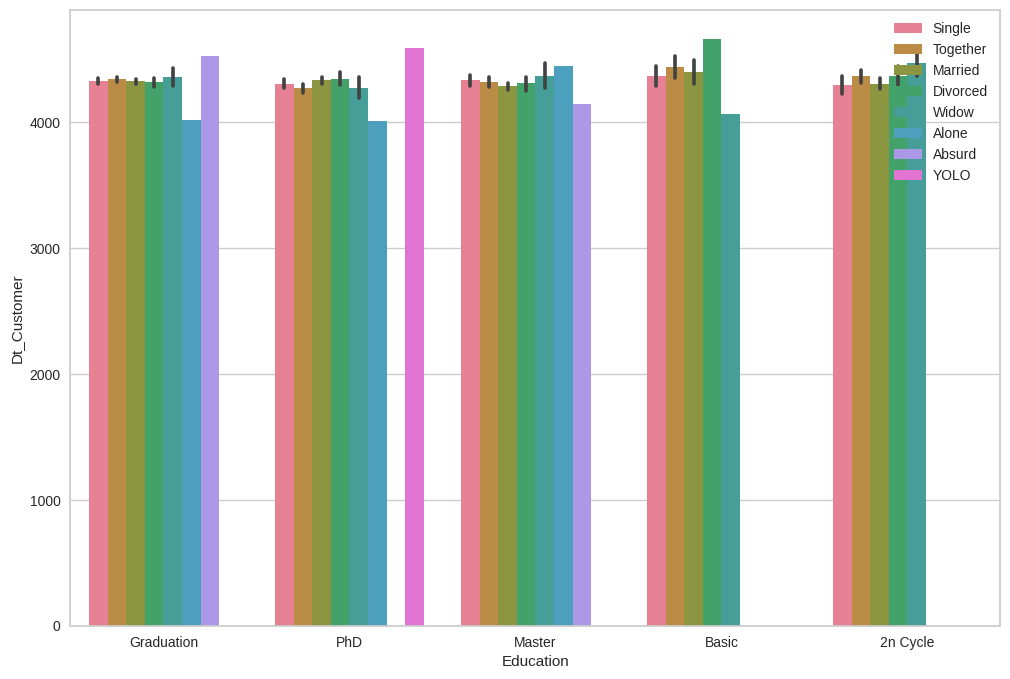

In [ ]:
#Multivariate analysis
temp_cols  = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer']
for i in temp_cols:
  plt.figure(figsize=(12, 8))
  sns.barplot(x='Education', y=i, hue='Marital_Status', data=data)
  plt.legend(loc='upper right')
  plt.show()

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Encode categorical columns
df = data.copy() #copy dataset before encoding
cat_cols = ['Education', 'Marital_Status']
encoder = LabelEncoder()
for col in cat_cols:
  df[col] = encoder.fit_transform(df[col])

df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,2,4,58138.0,0,0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,2174,2,4,46344.0,1,1,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,4141,2,5,71613.0,0,0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,6182,2,5,26646.0,1,0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,5324,4,3,58293.0,1,0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44


In [ ]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,2,4,46344.0,1,1,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,2,5,71613.0,0,0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,2,5,26646.0,1,0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,4,3,58293.0,1,0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44


## Handling Outliers

In [ ]:
from scipy.stats import zscore
#score dataset and remove outliers
z_scores = np.abs(zscore(df))
no_outliers = (z_scores < 4).all(axis=1)
df = df[no_outliers]

In [ ]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,2,4,46344.0,1,1,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,2,5,71613.0,0,0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,2,5,26646.0,1,0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,4,3,58293.0,1,0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,4354,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,58
2236,4,5,64014.0,2,1,3992,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,79
2237,2,2,56981.0,0,0,4128,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,44
2238,3,5,69245.0,0,1,4129,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,69


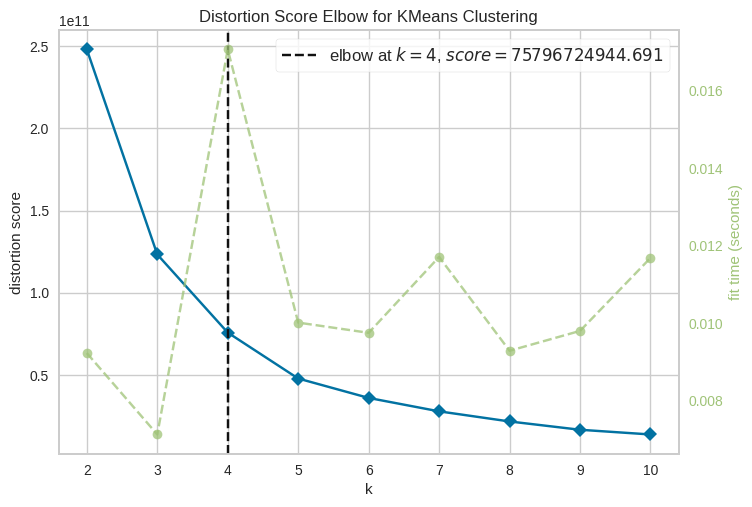

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Getting K and distortion score before scaling the data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) #scale dataset

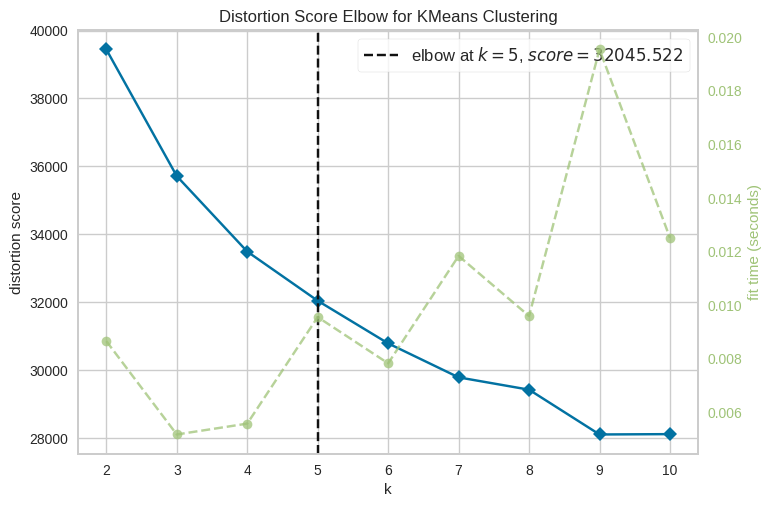

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Getting K and distortion score after scaling the data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_data)
Elbow_M.show()

it is always better to scale your data

# Feature engineering

In [ ]:
# Let's create a metric to score our data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def data_score(data):
  #define scaler model
  scaler = StandardScaler()
  #fit scaler model to data
  scaled_data = scaler.fit_transform(data)

  #define and fit kmeans model to datset
  kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
  kmeans.fit(scaled_data)

  #Get labels
  labels = kmeans.labels_

  #Score data
  sil_score = silhouette_score(scaled_data, labels)
  db_index = davies_bouldin_score(scaled_data, labels)
  ch_index = calinski_harabasz_score(scaled_data, labels)

  #Print Score
  print('Silhouette Score:', sil_score)
  print('Davies-Bouldin Index:', db_index)
  print('Calinski-Harabasz Index:', ch_index)


In [ ]:
#Score current data
data_score(df)

Silhouette Score: 0.17682444656124802
Davies-Bouldin Index: 2.1074175606256604
Calinski-Harabasz Index: 375.01565292345526


In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,2,4,46344.0,1,1,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,2,5,71613.0,0,0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,2,5,26646.0,1,0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,4,3,58293.0,1,0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44


Let's create a feature that tells us the number of children each customer has. This can be gotten from 'Kidhome', and 'Teenhome' columns.

In [ ]:
df_fe = df.copy() #create a new data for feature engineering
df_fe['Children'] = df_fe['Kidhome'] + df_fe['Teenhome']
df_fe.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)
df_fe.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
0,2,4,58138.0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68,0
1,2,4,46344.0,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71,2
2,2,5,71613.0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60,0
3,2,5,26646.0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41,1
4,4,3,58293.0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44,1


In [ ]:
data_score(df_fe)

Silhouette Score: 0.17283853658548823
Davies-Bouldin Index: 2.2034791236609252
Calinski-Harabasz Index: 378.62093511277186


Slight Improvement in data

Let's get the amount the customer spent on products by adding the these columns
(MntWines,	MntFruits,	MntMeatProducts,	MntFishProducts,	MntSweetProducts,	MntGoldProds)


In [ ]:
df_fe['Amount_Spent'] = df_fe['MntWines'] + df_fe['MntFruits'] + df_fe['MntMeatProducts'] + df_fe['MntFishProducts'] + df_fe['MntSweetProducts'] + df_fe['MntGoldProds']
data_score(df_fe)

Silhouette Score: 0.18118529264652936
Davies-Bouldin Index: 2.109094119705825
Calinski-Harabasz Index: 412.40389477797953


The Silhouette score is getting closer to 1, the db index reduced and our ch index increased
This means our data has gotten better, but after adding these columns should we then drop the individual column or leave them in the dataset. Let's find out!

In [ ]:
df_fe1 = df_fe.drop(['MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds'], axis=1)
data_score(df_fe1)

Silhouette Score: 0.08706882664886632
Davies-Bouldin Index: 2.3877900355634085
Calinski-Harabasz Index: 311.20739765209856


Its obvious our data got better when we created the 'Amount_spent' feature but got worse after we dropped the substituent features

So we would continue with df_fe

In [ ]:
#let's get the number of purchases
df_fe['Purchases'] = df_fe['NumDealsPurchases'] + df_fe['NumWebPurchases'] + df_fe['NumCatalogPurchases'] + df_fe['NumStorePurchases']
data_score(df_fe)

Silhouette Score: 0.19428755450148355
Davies-Bouldin Index: 2.075413439627938
Calinski-Harabasz Index: 440.2204333340758


We can still do more feature engineering by creating a feature that tells us the customer's family size

In [ ]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df_fe['family_size'] = data['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0) + df_fe['Children'] + 1
df_fe.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Amount_Spent,Purchases,family_size
0,2,4,58138.0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68,0,1617,25,1.0
1,2,4,46344.0,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71,2,27,6,3.0
2,2,5,71613.0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60,0,776,21,2.0
3,2,5,26646.0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41,1,53,8,3.0
4,4,3,58293.0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44,1,422,19,3.0


In [ ]:
data_score(df_fe)

Silhouette Score: 0.09552563583970777
Davies-Bouldin Index: 2.319008836683312
Calinski-Harabasz Index: 405.3210321144643


The 'family size' feature does not really help

In [ ]:
df_fe.drop('family_size', axis=1, inplace=True)
data_score(df_fe)

Silhouette Score: 0.19428755450148355
Davies-Bouldin Index: 2.075413439627938
Calinski-Harabasz Index: 440.2204333340758


# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
#scale data
scaled_df1 = scaler.fit_transform(df_fe)

#reduce data to 3 dimensions
pca = PCA(n_components=3)
pca.fit(scaled_df1)
PCA_df = pd.DataFrame(pca.transform(scaled_df1), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2133.0,-1.332476e-17,2.917293,-4.679335,-2.674033,-0.761487,2.416186,8.942488
col2,2133.0,-5.329903e-17,1.516088,-3.973140,-1.099375,-0.277218,0.957847,5.881670
col3,2133.0,4.663665e-17,1.289937,-2.925489,-0.769435,-0.140682,0.393319,5.718940


In [ ]:
data_score(PCA_df)

Silhouette Score: 0.4199166606176607
Davies-Bouldin Index: 0.87465089676396
Calinski-Harabasz Index: 1292.9102026944352


In [ ]:
#Use kmeans to separate data into clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
PCA_df['Clusters'] = kmeans.fit_predict(PCA_df)
PCA_df.head()

,col1,col2,col3,Clusters
0,4.700824,0.951112,0.212166,1
1,-2.864872,-0.708594,-0.298571,0
2,2.016387,-0.158203,-1.165816,1
3,-2.811050,-1.090639,-0.012273,0
4,-0.034872,0.846994,-0.968187,2


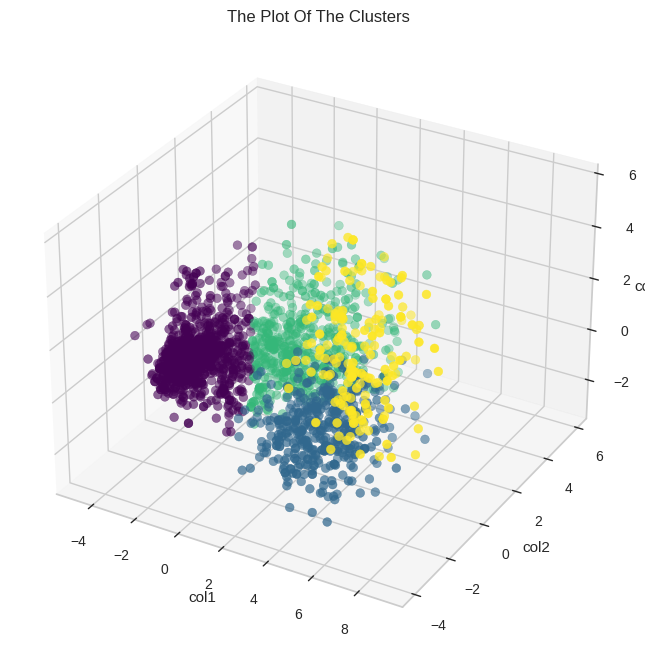

In [ ]:
#Visualize Clusters
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')

x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

#plot points
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap=cmap)

#label plot
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("col1")
ax.set_ylabel("col2")
ax.set_zlabel("col3")
plt.show()

Let's try with 2 principal components

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_df1)
PCA_df1 = pd.DataFrame(pca.transform(scaled_df1), columns=(["col1","col2"]))
PCA_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2133.0,-1.332476e-17,2.917293,-4.679335,-2.674033,-0.761487,2.416186,8.942488
col2,2133.0,-5.329903e-17,1.516088,-3.973140,-1.099375,-0.277218,0.957847,5.881670


In [ ]:
data_score(PCA_df1)

Silhouette Score: 0.47830433238685205
Davies-Bouldin Index: 0.8300204117658805
Calinski-Harabasz Index: 2445.1146178309627


In [ ]:
#Use kmeans to separate data into clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
PCA_df1['Clusters'] = kmeans.fit_predict(PCA_df1)
PCA_df1.head()

,col1,col2,Clusters
0,4.700824,0.951112,3
1,-2.864872,-0.708594,0
2,2.016387,-0.158203,1
3,-2.811050,-1.090639,0
4,-0.034872,0.846994,2


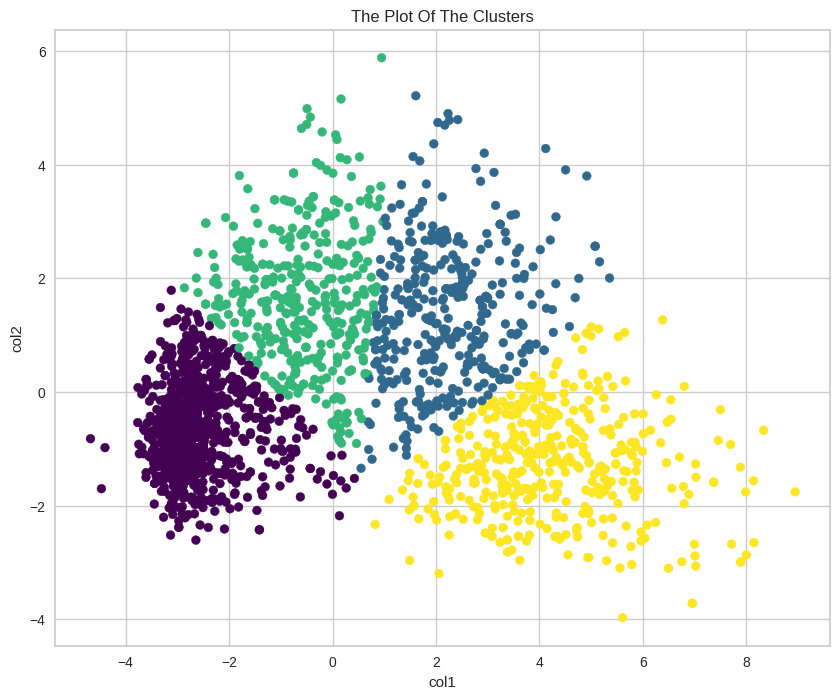

In [ ]:
#Visualize clusters
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")

x = PCA_df1["col1"]
y = PCA_df1["col2"]

#plot points
ax.scatter(x, y, s=40, c=PCA_df1["Clusters"], marker='o', cmap=cmap)

#label points
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("col1")
ax.set_ylabel("col2")
plt.show()

Making use of 2 principal components yields better results and is best for visualization

# Kmeans Optimization

In [ ]:
PCA_df1.head()

,col1,col2,Clusters
0,4.700824,0.951112,3
1,-2.864872,-0.708594,0
2,2.016387,-0.158203,1
3,-2.811050,-1.090639,0
4,-0.034872,0.846994,2


In [ ]:

kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=400,n_init=10,random_state=42)
PCA_df1['Clusters'] = kmeans.fit_predict(PCA_df1)
labels = kmeans.labels_
sil_score = silhouette_score(PCA_df1, labels)
db_index = davies_bouldin_score(PCA_df1, labels)
ch_index = calinski_harabasz_score(PCA_df1, labels)
print('Silhouette Score:', sil_score)
print('Davies-Bouldin Index:', db_index)
print('Calinski-Harabasz Index:', ch_index)


Silhouette Score: 0.5442937774176881
Davies-Bouldin Index: 0.7871558111997403
Calinski-Harabasz Index: 3927.145258140389


Changing max_iter and n_init has significantly improved our model

In [ ]:
PCA_df1.head()

,col1,col2,Clusters
0,4.700824,0.951112,3
1,-2.864872,-0.708594,0
2,2.016387,-0.158203,1
3,-2.811050,-1.090639,0
4,-0.034872,0.846994,2


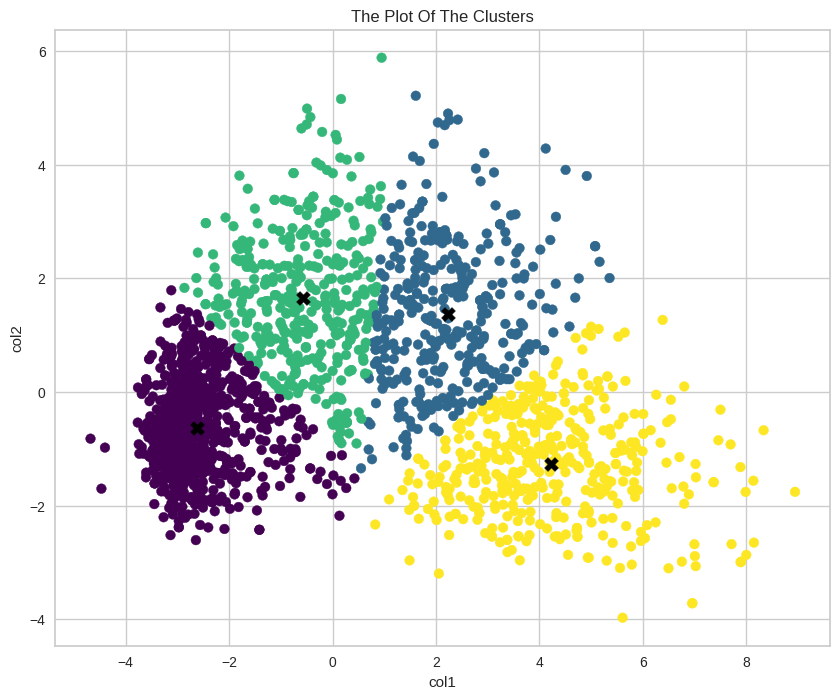

In [ ]:
#Final Visualization of clusters
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)

x = PCA_df1["col1"]
y = PCA_df1["col2"]

#plot points
ax.scatter(x, y, c=PCA_df1["Clusters"], marker='o', cmap=cmap)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

#label plot
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("col1")
ax.set_ylabel("col2")
plt.show()

# Customer Profiling

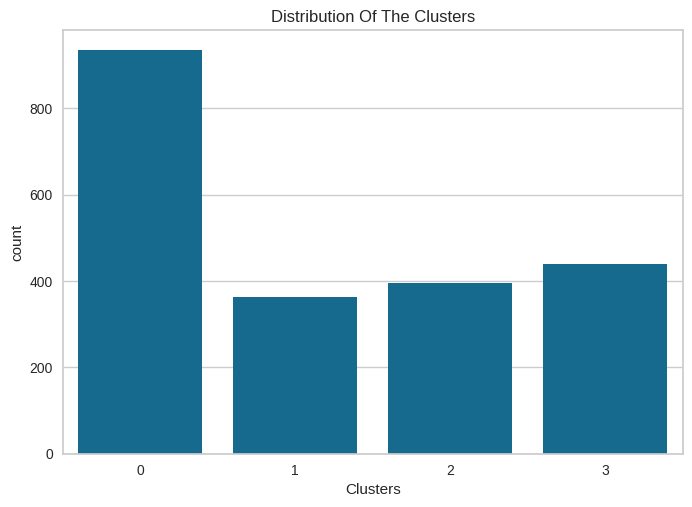

In [ ]:
sns.countplot(x=PCA_df1["Clusters"])
plt.title("Distribution Of The Clusters")
plt.show()

In [ ]:
data['Total_promo'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

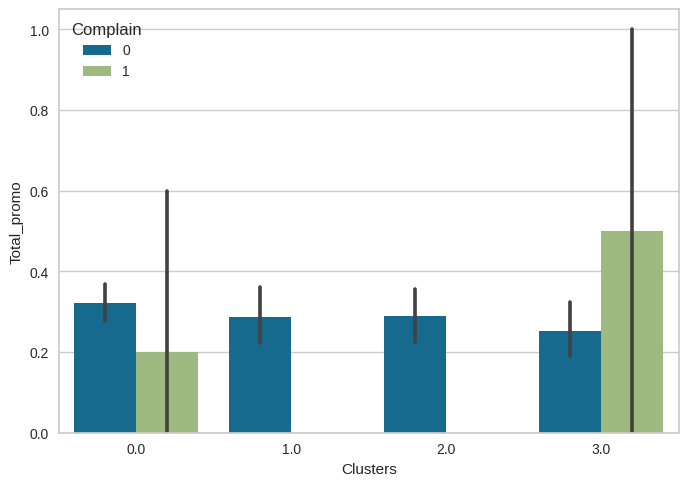

In [ ]:
sns.barplot(x=PCA_df1["Clusters"], y=data["Total_promo"], hue=data['Complain'])
plt.show()

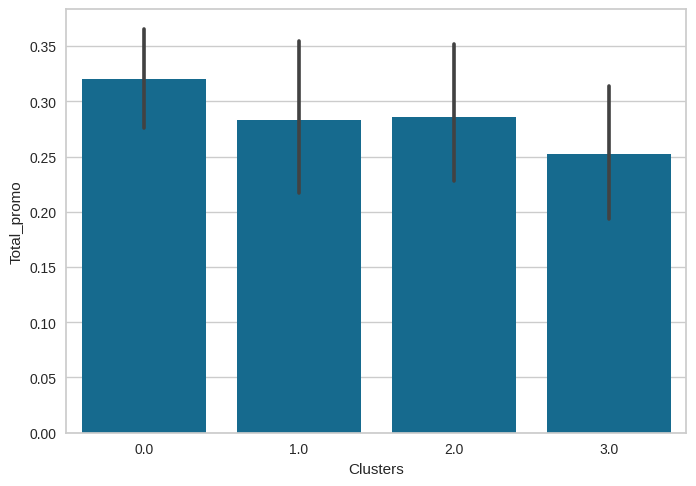

In [ ]:
sns.barplot(x=PCA_df1["Clusters"], y=data["Total_promo"])
plt.show()

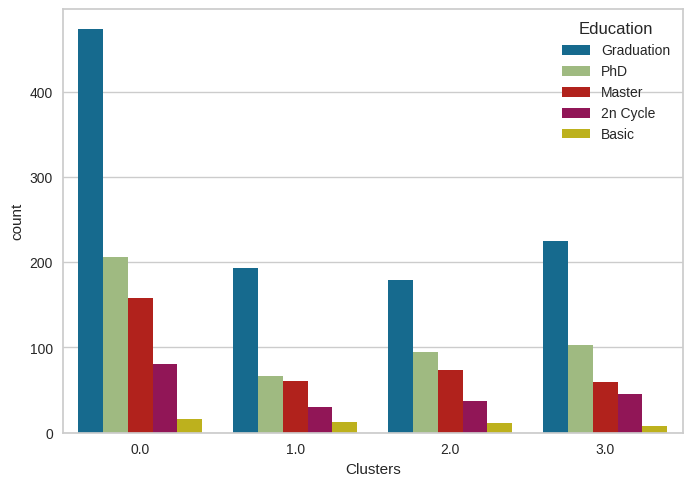

In [ ]:
sns.countplot(x=PCA_df1["Clusters"], hue=data["Education"])
plt.show()

In [ ]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_promo
0,5524,Graduation,Single,58138.0,0,0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68,0
1,2174,Graduation,Single,46344.0,1,1,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71,0
2,4141,Graduation,Together,71613.0,0,0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60,0
3,6182,Graduation,Together,26646.0,1,0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41,0
4,5324,PhD,Married,58293.0,1,0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44,0


In [ ]:
df_fe.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Amount_Spent,Purchases
0,2,4,58138.0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68,0,1617,25
1,2,4,46344.0,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71,2,27,6
2,2,5,71613.0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60,0,776,21
3,2,5,26646.0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41,1,53,8
4,4,3,58293.0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44,1,422,19


In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,4636,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,2,4,46344.0,1,1,4086,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,2,5,71613.0,0,0,4285,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,2,5,26646.0,1,0,4112,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,4,3,58293.0,1,0,4134,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44


### Radar Chart for profiling

In [ ]:
#Scale original cleaned data
scaled_data = scaler.fit_transform(df)


In [ ]:
#Turn series to dataframe
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

#Add cluster column to original cleaned and now scaled data
df_scaled['cluster'] = PCA_df1['Clusters']
df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,cluster
0,-0.356084,0.261253,0.338237,-0.832436,-0.932891,1.545405,0.301043,1.028731,1.624402,1.801833,2.519850,1.575828,0.889944,0.447668,1.522920,2.721613,-0.552791,0.734590,-0.277,-0.264025,-0.268066,-0.252667,0.0,0.0,2.452845,1.024510,3.0
1,-0.356084,0.261253,-0.243150,1.022931,0.911277,-1.186008,-0.391873,-0.868820,-0.642437,-0.727992,-0.650982,-0.638865,-0.730668,-0.155538,-1.164872,-0.578255,-1.176985,-0.138081,-0.277,-0.264025,-0.268066,-0.252667,0.0,0.0,-0.407690,1.281703,0.0
2,-0.356084,1.193113,1.002490,-0.832436,-0.932891,-0.197733,-0.807622,0.393173,0.608233,-0.161124,1.382081,-0.129740,-0.019180,-0.758745,1.522920,-0.211603,1.319792,-0.574416,-0.277,-0.264025,-0.268066,-0.252667,0.0,0.0,-0.407690,0.338663,1.0
3,-0.356084,1.193113,-1.214166,1.022931,-0.932891,-1.056887,-0.807622,-0.868820,-0.564270,-0.662404,-0.501766,-0.587952,-0.750432,-0.155538,-0.780902,-0.944907,-0.552791,0.298255,-0.277,-0.264025,-0.268066,-0.252667,0.0,0.0,-0.407690,-1.290223,0.0
4,1.435252,-0.670607,0.345878,1.022931,-0.932891,-0.947630,1.548291,-0.376187,0.451899,-0.203287,0.169704,0.022998,-0.552796,1.654080,0.371009,0.155049,0.071403,-0.138081,-0.277,-0.264025,-0.268066,-0.252667,0.0,0.0,-0.407690,-1.033031,2.0


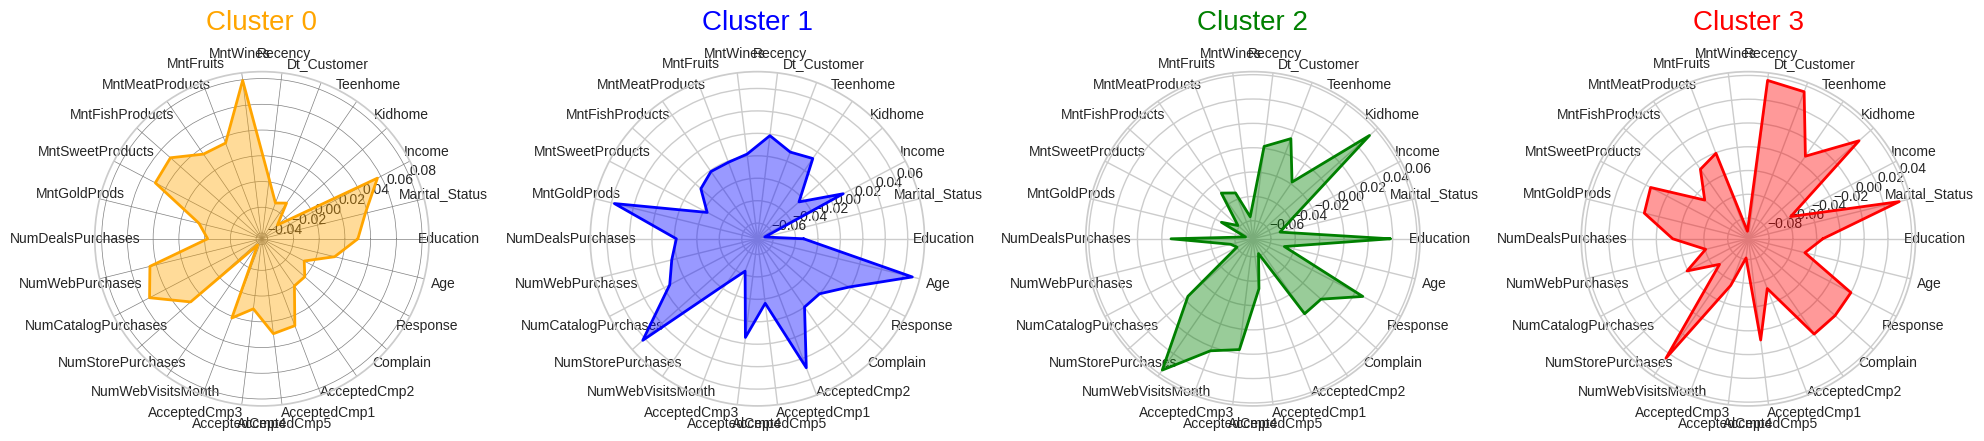

In [ ]:
#Create Radar Function

# Calculate the centroid of each cluster
cluster_centroids = df_scaled.groupby('cluster').mean()

# define radar function
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)


labels=np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

colors = ['orange', 'blue', 'green', 'red']

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]
    create_radar_chart(ax[i], angles, data, color, i)


ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

ax[3].set_xticks(angles[:-1])
ax[3].set_xticklabels(labels[:-1])


ax[0].grid(color='grey', linewidth=0.5)

# Display plot
plt.tight_layout()
plt.show()

The radar function was gotten from [Farzad Nekouei](https://www.kaggle.com/code/farzadnekouei/customer-segmentation-recommendation-system#Step-11.2-%7C-Histogram-Chart-Approach) on kaggle

# **Conclussion**

###  **Cluster 0**

 Likely high-income professionals who spend on wine and shop online frequently but don’t engage much with marketing campaigns.



###  **Cluster 1**

Older customers, prefers catalog purchases, limited digital interaction, and modest income/education levels.


### **Cluster 2**

Education-oriented customers with moderate income, preferring in-store and online shopping but not very active in promotional campaigns.



###  **Cluster 3**

Family-oriented customers, prefers in-store purchase and possibly younger.  They are day1 customers with average campaign engagement.

<br>


This can be used to
* Tailor marketing strategies
* Personalize offers and recommendations


